![Logo TUBAF](https://tu-freiberg.de/sites/default/files/media/freiberger-alumni-netzwerk-6127/wbm_orig_rgb_0.jpg)

In our teaching we employ interactive Jupyter notebooks in order to allow our students to play with the concepts and hence familiarize themselves more quickly with the new knowledge. Below, we give two simple examples of such scripts. The remainder can be found in Opal in the respective course materials.

Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/soilmechanics

# Beschreibung von Kornverteilungskurven

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import widgets
from ipywidgets import interact
from ipywidgets import interaction
import scipy as sp
from scipy import interpolate
import pandas as pd

#Some plot settings
import plot_functions.plot_settings
%run plot_functions/kornverteilungskurve_plots.ipynb

Im Zuge der Bestimmung einer Sieblinie werden Siebrückstände $m_i$ ermittelt. Die einzelnen zu den Siebdurchmessern $d_i$ gehörigen Siebrückstände $m_i$ können nun auf die Gesamtmasse $m_\text{d} = \sum m_i$ (Annahme vernachlässigbarer Siebverluste) bezogen werden, womit die Masseanteile

$$
    x_i = \frac{m_i}{m_\text{d}}
$$

ermittelt werden. Diese werden typischerweise in einer Summenkurve

$$
    F(d_i) = \sum \limits_{k=1}^i x_i
$$

aufgetragen. Dabei wird aufgrund der über Größenordnungen verteilten Korndurchmesser eine halblogarithmische Darstellung gewählt (siehe folgende Abbildung, rechts). Feinanteile, die nicht durch Siebung näher untersucht werden, sind nicht mit dargestellt. In der linken Abbildung sind die Masseanteile selbst und das zugehörige Histogramm der Masseverteilung dargestellt.

Mithilfe der Körnungslinie bzw. Kornverteilungskurve können die dominierenden Bestandteile (T, U, S, G) ermittelt werden. Des weiteren können die Ungleichförmigkeitszahl

$$
    C_U = \frac{d_{60}}{d_{10}}
$$

und die Krümmungszahl

$$
    C_C = \frac{d_{30}^2}{d_{10}\ d_{60}}
$$

abgeleitet werden. 

Die folgenden Siebrückstände seien gegeben:

In [2]:
Siebdurchmesser = np.array([63,31.5,16,8,4,2,1,0.5,0.25,0.125,0.063,0.001])#letzter: Rückstand in Null
Startwerte = np.array([0,0,842.4,1059.8,1222.9,788.0,706.6,407.6,210.0,195.7,0,0])

Massen = [widgets.FloatText(value=Startwerte[i],description=str(Siebdurchmesser[i])+' mm') for i in range(len(Siebdurchmesser))]
Eingabe=widgets.VBox(Massen)
Eingabe

In [3]:
def plot(Neuauswertung):
    m_i = Siebmassen(Eingabe)
    dm_i = Masseanteile(m_i)
    sum_dm_i = Siebdurchgang(dm_i)
    plot_KVK(sum_dm_i)

interact(plot, Neuauswertung=False);

interactive(children=(Checkbox(value=False, description='Neuauswertung'), Output()), _dom_classes=('widget-int…

Damit lassen sich die Masseanteile der einzelnen Kornfraktionen ablesen:

In [4]:
def Anteilsbestimmung(Neuauswertung):
    a=Anteile(Siebdurchmesser,Siebdurchgang(Masseanteile(Siebmassen(Eingabe))))
    display(a)
    
interact(Anteilsbestimmung, Neuauswertung=False);

interactive(children=(Checkbox(value=False, description='Neuauswertung'), Output()), _dom_classes=('widget-int…

# Aktive und passive Erddrücke aus dem Mohr'schen Spannungskreis

In [5]:
from matplotlib import patches

#Some plot settings
%run plot_functions/Mohrs_circle_K0_plots.ipynb

## Ebene Betrachtungen

Die folgenden Betrachtungen liegen in der $x$-$z$ Ebene und gelten für ebene Spannungszustände und ebene Verzerrungszustände mit $\sigma_{yy} = \sigma_2$.

Zusätzlich legen wir $\sigma_{zz}$ beliebig, aber ohne Einschränkung der Allgemeingültigkeit, zu 200 kPa fest.

Im kohäsionslosen Boden ergibt sich aus dem Mohr-Coulomb'schen Bruchkriterium:

$$
\displaystyle\frac{1-\sin\phi}{1+\sin \phi} \sigma_{zz} < \sigma_{xx} < \frac{1+\sin\phi}{1-\sin \phi} \sigma_{zz}
$$

mit 

\begin{align*}
    K_{\text{a}} &= \displaystyle\frac{1-\sin\phi}{1+\sin \phi}
    \\\\
    K_{\text{p}} &= \displaystyle \frac{1+\sin\phi}{1-\sin \phi}
\end{align*}

In kohäsiven Böden ergibt sich in analoger Betrachtungsweise der von den aktiven und passiven Grenzzuständen begrenzte Horizontalspannungsbereich

$$
K_{\text{a}} \sigma_{zz} - 2c \sqrt{K_{\text{a}}} < \sigma_{xx} < K_{\text{p}} \sigma_{zz} + 2c \sqrt{K_{\text{p}}}
$$

In [6]:
s_zz = 200.

In [7]:
plot_interactive_K0c()

interactive(children=(FloatSlider(value=20.0, description='$\\phi$ / °', max=30.0, min=10.0, step=5.0), FloatS…

## Spannungszustände und Schnittebenen im Mohr'schen Spannungskreis

In diesem Beispiel wollen wir einen gegebenen Spannungszustand mitsamt seiner Orientierung sowie den Bruchzustand in den Spannungskreis integrieren. Außerdem wollen wir die Funktion des Pols für die Bestimmung der Schnittebenen einzelner Komponenten des Spannungstensors demonstrieren.

Der Pol ist über den angegebenen Spannungszustand definiert. Damit sind alle angegebenen Ebenen in Bezug auf das $x-z$ Koordinatensystem zu verstehen. Der eingetragene grüne Zentriwinkel $2\theta^*$ hingegen beschreibt die Orientierung der Bruchebenen gegenüber den Hauptspannungsrichtungen (nur eine gezeichnet).

In [8]:
%run plot_functions/Mohrs_circle_plots.ipynb
plot_interactive_failure()

interactive(children=(BoundedFloatText(value=30.0, description='$\\varphi$ / °'), FloatText(value=1.3, descrip…

## Aktiver Erddruck mit Linienbruch

In [9]:
%run plot_functions/earth_pressure_plots.ipynb
plot_interactive_earth_pressure()

interactive(children=(IntSlider(value=10, description='$c$ / kN m$^{-2}$:', max=50, step=5), IntSlider(value=3…

## Tasks

* Compare the numbers you get to results obtained from the analytical expressions you find in the current norm.
* Investigate the influence of the different parameters.
* What happens at very high cohesion values? What does this mean?
* How high can a cohesive vertical slope be roughly? Select suitable parameters to answer this question.

![Erddruck.png](https://raw.githubusercontent.com/nagelt/Teaching_Scripts/master/Images/Erddruck.png)

# Böschungsbruchberechnungen am Gleitkreis mit lamellenfreiem Verfahren

In [10]:
#Slope geometry
H = 4.5
beta = np.arctan(4.5/9)

#Variation of slip circle centers
Mx = np.linspace(-H,H/np.tan(beta),30)
Mz = np.linspace(0.8*H,4*H,20)

#Soil properties
c = 5.
phi = np.deg2rad(20)
gamma = 16

#Distributed load (magnitude and range from shoulder)
p_load = 30.
xSV = np.array([0.5,3.5])

In [11]:
%run plot_functions/slope_stability_plots.ipynb

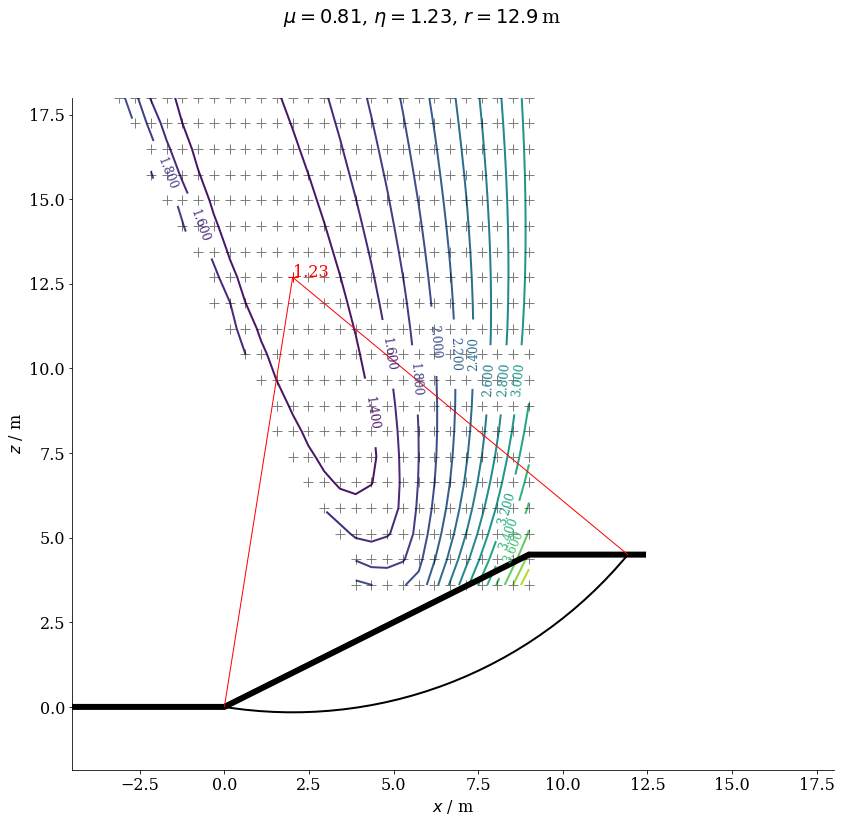

In [12]:
run_analysis()